In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 1e-13# J

PAR.I0_i =  [0.5* XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_J,
             2*XNLdyn.photons_per_J(PAR.E_i_abs[1])*pulse_energy_J,
             2*XNLdyn.photons_per_J(PAR.E_i_abs[1])*pulse_energy_J,
             2*XNLdyn.photons_per_J(PAR.E_i_abs[1])*pulse_energy_J]

PAR.N_photens = 4
PAR.t0_i       = [-10,10, 20,30]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [10,10,15,10]  # Rms pulse duration / fs
PAR.E_i_abs    = [857,853,851,848] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (10,10,10,10)

print(*zip(PAR.E_i_abs,PAR.I0_i))


(857, 363.724305038506) (853, 1473.7919892469336) (851, 1473.7919892469336) (848, 1473.7919892469336)


In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = False)

sim.par.I0_i

Starting to generate lookup tables for T between 301.0 to 1000300.0 and Ef between -31.6 and 31.6
Lookup tables generated.
Saving at ./fermi_lookup_table.npz


[363.724305038506, 1473.7919892469336, 1473.7919892469336, 1473.7919892469336]

In [5]:
np.outer([9,2],np.ones(10))

array([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [6]:
%%time
sim_options = dict(t_span=[-40, 120],method='RK45', rtol=1e-3, atol=1e-8, plot = True, return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


t:  -40.0
-21.813157014015097 10.000004533591618 -> 300.0076274880438 -2.184989966735884e-10
t:  -39.96179697934251


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:714: UserWarning: Number of holes got critically low for computational accuracy.
  warnings.warn(f'Number of holes got critically low for computational accuracy.')


-21.8131554288193 10.000004946426479 -> 321.5037552880562 -6.649475512432446e-07
t:  -39.987621509397464
-21.81315650038212 10.000004667357809 -> 308.3959757322527 -2.0194966943165582e-07
t:  -39.9814322640962
-21.81315624106178 10.00000473458424 -> 312.26715055345534 -3.186474373251258e-07
t:  -39.950486037589855
-21.813154940792174 10.000005071099295 -> 326.21454059544897 -8.899730232769798e-07
t:  -39.94498448621095
-21.813154707671426 10.000005131118701 -> 328.01621368139234 -9.800690587979943e-07
t:  -39.93810754698732
-21.81315441486909 10.000005206238974 -> 330.3701405693213 -1.1105383705967142e-06
t:  -39.93810754698732
-21.813154415824837 10.000005206249288 -> 330.3701405693213 -1.1105383705967142e-06
t:  -39.9151126426367
-21.813153441038594 10.000005457591119 -> 337.3857116812634 -1.5599673570676487e-06
t:  -39.903615190461394
-21.8131529439033 10.000005584468164 -> 340.6228767565678 -1.7945413670616972e-06
t:  -39.84612792958485
-21.813150489544654 10.000006220202671 -> 353

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.528e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.694e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -29.889676193740886
-21.811023895808813 10.000408247782811 -> 817.2642688589929 -0.0021315508230781433
t:  -29.31814263809211
-21.810636011345867 10.000469066395143 -> 851.0296235940941 -0.0025816342042546125
t:  -29.032375860267724
-21.810452260925995 10.000510251805876 -> 866.4483993816083 -0.0028046747908856418
t:  -27.603541971145784
-21.809069551939753 10.000731303884846 -> 960.7373505718052 -0.004421047021573088


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.090e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.806e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -27.349527057524107
-21.80843187857127 10.000768915806752 -> 996.0301458209877 -0.005126680925826577
t:  -27.032008415497007
-21.808034753714168 10.000835849412436 -> 1017.0639479048284 -0.005533663998660288


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.893e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -27.032008415497007
-21.808609378225537 10.00085268076648 -> 986.8988883083382 -0.004891922707138008
t:  -26.484520367643963
-21.8080142739079 10.000972005002462 -> 1017.9476370911601 -0.005506941317278802
t:  -26.210776343717438
-21.80762609573069 10.00105188809069 -> 1040.2061658135299 -0.00594934042841011
t:  -24.842056224084825
-21.80643746110649 10.001479300856893 -> 1095.6141487815535 -0.007060712709668238


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.791e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.865e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -24.598728202816808
-21.8075784775531 10.00155387226983 -> 1041.1649046987466 -0.005806586244517575
t:  -24.29456817623178
-21.80689823207193 10.0016812481922 -> 1073.8611283645523 -0.006480926407489207


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.876e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -24.29456817623178
-21.804763959229287 10.001709060269942 -> 1163.270586286496 -0.008581973097811613
t:  -26.552350198635324
-21.808088003052212 10.000957221587937 -> 1014.1576392947132 -0.005432693347124484
t:  -26.312521090204484
-21.807750323049618 10.001024838170673 -> 1033.467583552417 -0.005818227506555473
t:  -25.11337554805028
-21.806514618080406 10.001383601588703 -> 1092.1696456403897 -0.0070322157592919154
t:  -24.900194118333975
-21.807145880894456 10.001447749753996 -> 1062.7292594052915 -0.006318772791390259
t:  -24.633717331188596
-21.80648674201559 10.00155076145335 -> 1092.6705153584066 -0.006972031539046242


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.439e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.287e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -24.633717331188596
-21.805132776473414 10.001568803345137 -> 1148.9012476168828 -0.008323667374899202
t:  -26.63478535722778
-21.808177607782387 10.000939254963175 -> 1010.7062450110656 -0.005374645087512064
t:  -26.436173828093168
-21.807879091708166 10.000992922769097 -> 1024.8697587468334 -0.005648136692816053
t:  -25.443116182420106
-21.807184434236245 10.001274788911502 -> 1061.2232777731895 -0.00634829060898312
t:  -25.266572600967116
-21.80825841180159 10.00132624318815 -> 1005.0676600841691 -0.005115201267143377
t:  -25.04589312415088
-21.807840943668598 10.001403591616565 -> 1027.2266991352776 -0.005539722864158492


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.761e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.797e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -25.04589312415088
-21.80600273712024 10.001413447721927 -> 1112.276344118051 -0.007487357386718685
t:  -24.679884763551517
-21.805388177361937 10.001544478285927 -> 1139.0649037859725 -0.008082999131559632
t:  -24.496880583251833
-21.805007201420086 10.001624198536291 -> 1154.334202183521 -0.008404924530641011
t:  -23.58185968175342
-21.803681958612465 10.002040839222394 -> 1202.1214036585598 -0.009393482501677042
t:  -23.419189299264815
-21.804370228874593 10.00211743893956 -> 1177.2171735509655 -0.008756188408979071
t:  -23.21585132115406
-21.803788230345507 10.002229397641518 -> 1200.1204367907221 -0.009257702790538502


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.401e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.335e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -23.21585132115406
-21.802347191152972 10.002241311545813 -> 1248.8110538031174 -0.010463864837445769
t:  -22.875853391124746
-21.801490209314277 10.002432101213596 -> 1272.9344531426304 -0.010993821310629315
t:  -22.705854426110086
-21.800936811672525 10.002546158964481 -> 1291.9410033781114 -0.011390875933875222
t:  -21.8558596010368
-21.798590752036144 10.003139532125438 -> 1356.1628303921395 -0.012582192647181856


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.000e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.185e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -21.70474940991266
-21.798717780426895 10.003249151849685 -> 1353.6071953792464 -0.012482765974651144
t:  -21.51586167100749
-21.7980885208923 10.003405693649444 -> 1369.9116561160927 -0.012729609579853474


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.801e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -21.51586167100749
-21.7972403463527 10.003419445780892 -> 1391.297014310339 -0.013205448584056256
t:  -22.930059365562798
-21.801626838192103 10.002401683558247 -> 1269.9695622536187 -0.010877799101255192
t:  -22.787163387767166
-21.80126895038702 10.002494945713062 -> 1282.396668786445 -0.011142547194122443
t:  -22.072683498789008
-21.798792926441305 10.002977157931829 -> 1353.2804446247044 -0.012605639429539295
t:  -21.945664851859558
-21.79756335378441 10.00306652646918 -> 1385.0854910951732 -0.013272371589838627
t:  -21.786891543197747
-21.79707069791629 10.003190151376554 -> 1395.941577791282 -0.013463258452693694


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.224e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.072e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -21.786891543197747
-21.798197117819132 10.003198274573041 -> 1367.2294994360402 -0.012808916626202205
t:  -22.96925202647803
-21.801725625260048 10.002379690616246 -> 1268.7463956714198 -0.010896997701129507
t:  -22.84595237914002
-21.801361585399963 10.002458556799645 -> 1278.5915937467494 -0.011099064105762224
t:  -22.229454142449953
-21.799633894749924 10.002864494567882 -> 1328.9961097835928 -0.01211567937518332


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.514e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -22.119854455927275
-21.799500448738193 10.00293974467859 -> 1333.8457993138827 -0.012145784964852524


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.822e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.571e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -21.982854847773925
-21.7989425226295 10.003041747231991 -> 1347.3807384273834 -0.012436456455253264
t:  -21.982854847773925
-21.7986450540364 10.003046937484697 -> 1355.6619960809442 -0.01258720264418578
t:  -21.75756111694134
-21.79795542673373 10.003216907812147 -> 1372.8561049794428 -0.012884933789443664
t:  -21.644914251525048
-21.797583323145407 10.003312468322594 -> 1384.407303655384 -0.013126600604012495
t:  -21.081679924443588
-21.794854125224777 10.003802750821428 -> 1448.8887891005995 -0.014250973096073594
t:  -20.981549377406882
-21.793164611700387 10.003893586889372 -> 1484.9827603405872 -0.014894875087673398


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.553e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.312e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -20.856386193611
-21.792795625702528 10.004015129944156 -> 1494.0763132043403 -0.015005863519796492
t:  -20.856386193611
-21.79455737398077 10.004020122796907 -> 1456.155418721381 -0.014300436776627734
t:  -20.64583797177254
-21.793679317087168 10.004226985856862 -> 1474.2345039620218 -0.014462060954882006
t:  -20.540563860853307
-21.793299158241645 10.004342114317495 -> 1483.1844378145329 -0.014656644753859638
t:  -20.01419330625715
-21.789060103861924 10.004931337564305 -> 1567.9586522219329 -0.015708058920171908
t:  -19.92061631877339
-21.784972275195045 10.005040254103386 -> 1645.2283552408162 -0.016586457160300938


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.223e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.059e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -19.80364508441869
-21.784793514640356 10.005184806653343 -> 1647.1317880489587 -0.016644873248239378
t:  -19.80364508441869
-21.78971463160033 10.005190054160447 -> 1556.7751474043287 -0.015432016853548447
t:  -20.6726805438559
-21.79379125964006 10.004200613102205 -> 1471.7615003986573 -0.014459066513001773
t:  -20.580827718978348
-21.793432982550478 10.004299728105162 -> 1482.1912708425023 -0.014595346783931262
t:  -20.121563594590594
-21.791288008592016 10.004805544850239 -> 1524.7127212520404 -0.01510331803695486
t:  -20.039916639143883
-21.790549243202655 10.004898921745852 -> 1538.902629999935 -0.015229741563629773


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.167e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.148e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -19.937857944835493
-21.79000367793134 10.005021487774245 -> 1552.7228599161763 -0.015419214009730453
t:  -19.937857944835493
-21.790515283619616 10.005024852802704 -> 1542.1939798665153 -0.015241374162783927


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.016e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -19.76294059096167
-21.789713876864685 10.005236912976875 -> 1556.7751474043287 -0.015432016853548447
t:  -19.67548191402476
-21.789213322181194 10.005352615615859 -> 1567.3156582011252 -0.01543630258920814
t:  -19.238188529340206
-21.788492998855414 10.005942173081014 -> 1580.4058924174738 -0.015318141448187106
t:  -19.16044748317406
-21.790937270461274 10.006050809390814 -> 1531.8864133171694 -0.014535924186011684


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.994e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.558e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -19.063271175466383
-21.790111967550533 10.00619281648522 -> 1547.8491910967005 -0.014751880647654758
t:  -19.063271175466383
-21.786198928950615 10.006196276398418 -> 1622.687244062133 -0.01572676855681543


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.256e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -18.892682417824105
-21.785289755456763 10.00644770208234 -> 1640.2844710399552 -0.01580361746569281
t:  -18.807388039002962
-21.78478841270644 10.006584307465753 -> 1646.432546781253 -0.01585591683668852
t:  -18.380916144897263
-21.78156722704188 10.007279604706133 -> 1703.6763122791199 -0.01595476443250554
t:  -18.305098919278475
-21.7798967351091 10.007407391622353 -> 1728.144961176084 -0.016107462557227947


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.169e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -8.406e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -18.210327387254985
-21.779525842646414 10.00757406324475 -> 1733.925835172654 -0.01601979237903528
t:  -18.210327387254985
-21.781137842746066 10.007578173086994 -> 1709.7807599398163 -0.015824578435406522
t:  -18.912086782863852
-21.785393173375994 10.006419102567236 -> 1637.7388150810239 -0.015805746190499903
t:  -18.836494586562587
-21.784941823038277 10.006539048280672 -> 1644.295287293165 -0.015744210223253674
t:  -18.458533605056257
-21.783715283757843 10.00714837955681 -> 1665.2010897507446 -0.015655547049890473
t:  -18.391340541677355
-21.785057896052653 10.007260196028401 -> 1643.8685021078434 -0.015408396541428004


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.621e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.333e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -18.307349212453726
-21.78436738085667 10.007405037169846 -> 1655.1114707263964 -0.015510808225670303
t:  -18.307349212453726
-21.781962638632518 10.007407822423001 -> 1696.2344702119094 -0.015783417015530432


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.165e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -18.1605043902381
-21.781070630305514 10.007663008522192 -> 1708.5684248123391 -0.01580496906146145
t:  -18.087081979130286
-21.780549164412587 10.007799854391784 -> 1718.6803349270315 -0.015840571299792217
t:  -17.719969923591215
-21.777673400774333 10.008494438047036 -> 1763.8804148758493 -0.01566157840773208
t:  -17.654705558162046
-21.776655522361775 10.008621838432841 -> 1779.5663886003965 -0.015565955424829525


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.663e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.016e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -17.573125101375588
-21.776106706216513 10.008786373532292 -> 1787.0665938393536 -0.0156251783466832
t:  -17.573125101375588
-21.77679979553163 10.008789115656928 -> 1777.7845735291712 -0.015583255817563924
t:  -18.178163701795132
-21.78117790172796 10.007632320270726 -> 1709.964358430856 -0.01580722106640131
t:  -18.113570946465835
-21.780732764603144 10.007751713449792 -> 1714.2346020909924 -0.015788853969773697
t:  -17.790607169819346
-21.778595417198172 10.008356639812451 -> 1751.7162711033534 -0.01567189987663653
t:  -17.733191387304416
-21.778315464663827 10.00846723360413 -> 1753.4859133780537 -0.015626385943233956


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.469e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.125e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -17.66142165916075
-21.777805931258644 10.008609368885303 -> 1762.6412014902685 -0.015640337785535863
t:  -17.66142165916075
-21.777608573300984 10.008611430888218 -> 1766.4542902187582 -0.015590160437291445


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.871e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -17.532236148502157
-21.77668916184591 10.008869003633416 -> 1781.2414002602834 -0.015489967931657134
t:  -17.46764339317286
-21.776209845256822 10.009005796126576 -> 1787.5424567262903 -0.015393914473877501
t:  -17.14467961652637
-21.77418681348837 10.009698609841243 -> 1816.1735151382256 -0.015060148136543106
t:  -17.08726383401144
-21.774422322362366 10.00982518036604 -> 1813.5905334631448 -0.014968096190928648


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.473e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.872e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -17.015494105867777
-21.773772792663497 10.009987781332164 -> 1824.2233751955816 -0.01491422378360241
t:  -17.015494105867777
-21.77285259223137 10.009990080620675 -> 1835.406431777245 -0.014995038931060023


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.766e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -17.548749118828198
-21.77680668442253 10.008836079731374 -> 1777.7845735291712 -0.015583255817563924
t:  -17.492412848661917
-21.77634406134821 10.0089544812116 -> 1782.585133294351 -0.015424251387774035
t:  -17.21073149783053
-21.77536504447493 10.009553224307426 -> 1799.2437102753229 -0.015110556361959127
t:  -17.160654813238285
-21.777110666893194 10.009662385239956 -> 1772.1616351179052 -0.014998310364783052


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.353e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.169e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -17.098058957497976
-21.776417916552496 10.009801921663044 -> 1785.3260435380112 -0.015004379729790074
t:  -17.098058957497976
-21.773500198509364 10.009803416781198 -> 1827.8685381561609 -0.015000531417729945


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.681e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -16.985386417165422
-21.77264338041675 10.010056005926575 -> 1841.3166720215652 -0.014803176148980413
t:  -16.929050146999142
-21.772225012387683 10.010188985168012 -> 1844.4304914111788 -0.014869853715891779
t:  -16.647368796167754
-21.76868298716763 10.010861231294122 -> 1897.1063002841188 -0.014389397241103552
t:  -16.59729211157551
-21.76598211217538 10.010983660051654 -> 1931.6911477983067 -0.014112427627111401


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.476e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.340e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -16.5346962558352
-21.76564943125151 10.01114010677454 -> 1937.1970914830895 -0.01388832003581797
t:  -16.5346962558352
-21.76877890020827 10.011141883062095 -> 1896.2637348134201 -0.014165553523685759
t:  -16.431176693160605
-21.76788939239436 10.01140213201461 -> 1905.6957357910605 -0.01395441361369798
t:  -16.379416911823306
-21.767445698355782 10.011538427410379 -> 1912.7555018577357 -0.013840716693138688
t:  -16.12061800513682
-21.765087643638182 10.012226688692794 -> 1944.881960653283 -0.013350204303115731
t:  -16.074609310614775
-21.76457696956598 10.012351901513544 -> 1953.4798628381745 -0.01319130758289866


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.654e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.899e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -16.017098442462224
-21.763984862058706 10.01251136845891 -> 1960.4355950418233 -0.012979287421853059
t:  -16.017098442462224
-21.764131893300778 10.012512686143392 -> 1956.7133055147601 -0.01304941852862207


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.511e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -15.915302137693482
-21.763183006841018 10.012796332828442 -> 1971.42826265221 -0.012718900971830038
t:  -15.86440398530911
-21.762714657853024 10.012944617348044 -> 1976.781148481258 -0.012601144870995284
t:  -15.609913223387252
-21.760115134438752 10.013693046818368 -> 2011.6809767909087 -0.011837409428935075
t:  -15.564670421267811
-21.759339533990783 10.013828957168805 -> 2020.1186648715973 -0.0117316981975506


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.081e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.350e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -15.50811691861851
-21.75884078261231 10.014002049679123 -> 2027.62759183267 -0.011619904261092273
t:  -15.50811691861851
-21.759264280699323 10.014003637674357 -> 2017.7769863403364 -0.011685542281018257
t:  -15.413580041744774
-21.75829096572301 10.014294407813477 -> 2033.8529300082969 -0.011389171866420966
t:  -15.366311603307906
-21.757756139531846 10.014445791730688 -> 2041.9689675620987 -0.011136809968130379
t:  -15.129969411123568
-21.755749608967662 10.0152091656637 -> 2067.20883559354 -0.010425090323618491
t:  -15.087953021401907
-21.756381336417 10.015347569504573 -> 2060.1320481107423 -0.010564142448679092


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.115e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.999e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -15.035432534249832
-21.75572613510295 10.015523489481053 -> 2069.207455331301 -0.010210612470427094
t:  -15.035432534249832
-21.754236859693766 10.015524850341167 -> 2085.131685360167 -0.00990397935205145


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.837e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -15.423591951048769
-21.758394044453645 10.014263613859232 -> 2032.2000025451107 -0.011369512111384594
t:  -15.381329467263898
-21.757942193176593 10.014398391779599 -> 2040.5894316764652 -0.011199144751808277
t:  -15.170017048339544
-21.755575663713834 10.015077452921226 -> 2067.730734962574 -0.010456030760073176
t:  -15.132450396086325
-21.754995835920887 10.015200406791147 -> 2075.4407306474995 -0.010332168278155862


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.701e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.562e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -15.085492080769802
-21.754532795194805 10.015356292097689 -> 2083.561520777237 -0.010066590620320781
t:  -15.085492080769802
-21.754762529407724 10.015357240431408 -> 2079.5817945184567 -0.010183308780280953
t:  -15.003007438283362
-21.753826619630388 10.015632117788517 -> 2089.563518403471 -0.009788377839143436
t:  -14.961765117040143
-21.753385167693686 10.015774388393503 -> 2096.910593788686 -0.009743311918205322
t:  -14.755553510824045
-21.749873890912102 10.01649097956005 -> 2140.1762252000553 -0.008494296961968573
t:  -14.71889366971896
-21.747328040474397 10.0166206826211 -> 2168.613310079284 -0.007799724227105287


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.142e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.027e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -14.673068868337605
-21.74700618855648 10.016784920306662 -> 2173.4581307185026 -0.007700536400555791
t:  -14.673068868337605
-21.74987513856778 10.016785784753301 -> 2141.162237175684 -0.008332195286680388
t:  -14.590064747288583
-21.748883335526234 10.017084389218981 -> 2151.8206157351856 -0.007856542218162232
t:  -14.548562686764072
-21.74842127949974 10.017238853996043 -> 2158.3302581733797 -0.007834795566807884
t:  -14.341052384141515
-21.744508577339325 10.018016744513503 -> 2204.2219336055455 -0.0063874322645745
t:  -14.304161663675282
-21.741478899267694 10.01815746477504 -> 2237.72332124217 -0.005626415338179314


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.070e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -8.565e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -14.258048263092492
-21.741232301042835 10.018335648410511 -> 2242.9335692169057 -0.005366101709523008
t:  -14.258048263092492
-21.744724677629502 10.01833663288924 -> 2202.043406368297 -0.00625604204857666
t:  -14.181905498258983
-21.743755644916966 10.018631954087576 -> 2213.6281715795826 -0.005926612335199977
t:  -14.143834115842226
-21.743224643636925 10.018784183628464 -> 2218.0449349516953 -0.005565282559539142
t:  -13.953477203758451
-21.74188992136985 10.019550233964477 -> 2234.0137765377067 -0.0049190340102356345
t:  -13.919635974943558
-21.743654420789998 10.019688554658325 -> 2214.7344701149195 -0.005334866289365081


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.067e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.123e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -13.877334438924942
-21.742816686115223 10.019863481347125 -> 2223.6864498222626 -0.004853125095696242
t:  -13.877334438924942
-21.73982876978342 10.019864353901774 -> 2257.184581749195 -0.004102701463283509


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.821e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -13.80660465764918
-21.738887594106508 10.02015781542867 -> 2268.012436036878 -0.00365478500361327
t:  -13.771239767011298
-21.73841143707013 10.020308665291942 -> 2274.290138834528 -0.0035218144422870523
t:  -13.59441531382189
-21.73535578110182 10.021067328574613 -> 2310.6887338817824 -0.0021848206444570195
t:  -13.562979855477108
-21.733842868213372 10.021204173418175 -> 2327.5788636148604 -0.0017105812391076114


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.058e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.810e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -13.523685532546128
-21.733413067853554 10.021376970142674 -> 2330.389527712922 -0.0013769316446197166
t:  -13.523685532546128
-21.734880574537993 10.021377674491296 -> 2314.163916902326 -0.0017873744983543105
t:  -13.458146288657252
-21.73395929414015 10.021666763899697 -> 2327.3994402462095 -0.001298235581296936
t:  -13.425376666712813
-21.733472993463266 10.021814981025132 -> 2330.389527712922 -0.0010860035665007928
t:  -13.261528556990621
-21.731413305852215 10.022559972350818 -> 2353.7789977692346 -9.999881058142535e-05
t:  -13.23240000415112
-21.731627962214247 10.022694115829012 -> 2353.3448306053037 5.598692890629309e-05


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.150e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.006e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -13.195989313101745
-21.730951788657087 10.022863387983403 -> 2358.7840023162685 0.0002775227812552572
t:  -13.195989313101745
-21.730072670942064 10.02286410883331 -> 2369.3314076522 0.00066472189948108
t:  -13.13414137619904
-21.729170232272654 10.023152474948642 -> 2377.962891689306 0.001020795623372095
t:  -13.103217407747687
-21.72869105957389 10.023300036665216 -> 2382.175332478116 0.0010905073415177213
t:  -12.948597565490923
-21.725747651720035 10.024041468809983 -> 2419.9676512145224 0.0028338165571781815
t:  -12.921109593534165
-21.724322431693622 10.024174926297402 -> 2433.02512982214 0.0030491299688488738


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.110e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.237e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -12.886749628588218
-21.724046823924485 10.024343097902653 -> 2435.707189646036 0.003241412637782659
t:  -12.886749628588218
-21.72536089169415 10.024343620357085 -> 2420.9140377582025 0.0028101464325747116
t:  -12.82693297274568
-21.724371663659333 10.024637161239507 -> 2434.1807222158222 0.0034642983347872303
t:  -12.797024644824411
-21.723882348712884 10.02478718525768 -> 2440.408002384665 0.0038590169657535256
t:  -12.647483005218069
-21.721801082587984 10.025540747111368 -> 2461.461800187881 0.00483215885144439
t:  -12.620897824843608
-21.722080289954683 10.025676261115136 -> 2460.9842223877176 0.005049926031787777


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.619e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.682e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -12.587666349375532
-21.72132915852186 10.025847019023542 -> 2464.7589096398265 0.0053807747542258255
t:  -12.587666349375532
-21.7203840379147 10.02584756830749 -> 2479.7896355751304 0.00557468940288075
t:  -12.530743764484063
-21.719385334792545 10.026140764984804 -> 2486.6900657687756 0.006148976181322041
t:  -12.502282472038328
-21.718928393833558 10.026290383653402 -> 2493.359159441407 0.006512664853772776
t:  -12.359976009809657
-21.716453523094195 10.027041715476175 -> 2520.9685720814778 0.007937893773577898
t:  -12.334677083191226
-21.715845207790245 10.027176814913581 -> 2524.6066521592575 0.008057061389987297


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.629e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.950e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -12.303053424918188
-21.715318652497526 10.027346836541048 -> 2532.812890003159 0.008561644008452163
t:  -12.303053424918188
-21.715579521231685 10.027347191099153 -> 2527.791178442582 0.008421989166112809


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.498e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -12.246830288300542
-21.714627015008308 10.02765012460734 -> 2538.1420082990926 0.009056058559547608
t:  -12.21871871999172
-21.714163716355866 10.02780460689025 -> 2543.129607638936 0.009187799461633617
t:  -12.078160878447607
-21.711070408397173 10.028580216438154 -> 2577.562274010732 0.010806627438849858
t:  -12.053172817728653
-21.709457503097205 10.028719560236633 -> 2592.9395523193452 0.011441482488372401


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.097e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.647e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -12.02193774182996
-21.708998552622923 10.028894945940447 -> 2597.3192358961787 0.011928601000713357
t:  -12.02193774182996
-21.710614210513608 10.028895419570983 -> 2583.111480737638 0.011305510028842392
t:  -11.966307393814143
-21.709608289015588 10.029208486120222 -> 2590.674912455057 0.011771596050408561
t:  -11.938492219806236
-21.70909751787923 10.029368031094013 -> 2597.5898026131654 0.012151434671702432
t:  -11.799416349766693
-21.706571414050806 10.030168967289587 -> 2627.7332115689364 0.013790096827728249
t:  -11.774691750648552
-21.706190996543477 10.030312876294936 -> 2632.5682710848596 0.014095678465718464


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.065e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.470e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -11.743786001750875
-21.705582088348514 10.030493904408395 -> 2634.774129074911 0.014376600302494325
t:  -11.743786001750875
-21.70548922661015 10.030494257147916 -> 2637.833451064862 0.014487699396452669


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.122e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -11.691397593505176
-21.704521724866467 10.030801738186742 -> 2645.290864789621 0.015005144590732655
t:  -11.665203389382325
-21.704041277865414 10.030958197043764 -> 2654.232369178349 0.0153232050124128
t:  -11.534232368768075
-21.70091344874734 10.031743386898572 -> 2684.9264254067957 0.016971850482777384
t:  -11.510948631769987
-21.699329201831546 10.031884375996725 -> 2701.501625080478 0.017944556347806895


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.760e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.140e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -11.481843960522376
-21.698809429140233 10.032061612402334 -> 2708.1614219645976 0.018272407650634648
t:  -11.481843960522376
-21.700348517320815 10.032061880145895 -> 2689.477194476339 0.017302875309177068


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.860e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -11.428635614841157
-21.699272424800643 10.032386481269345 -> 2702.412546077251 0.018296139034795544
t:  -11.402031442000549
-21.698788076223565 10.032551629107623 -> 2705.1069928800184 0.01837202461784848
t:  -11.269010577797504
-21.69541436677351 10.033380341408533 -> 2741.9753592666398 0.020341122436557058
t:  -11.245362424161407
-21.693574249439322 10.033528970389378 -> 2761.127611286797 0.02145318364257598


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.786e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.523e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -11.215802232116285
-21.693006717429775 10.033715952455381 -> 2765.702220843132 0.02180088243327738
t:  -11.215802232116285
-21.694884919493262 10.03371652081135 -> 2749.462626160476 0.02092989846958737


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.147e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -11.166647325863515
-21.69385917302721 10.034028108640715 -> 2759.744389573985 0.021636325241763288
t:  -11.14206987273713
-21.693353600519714 10.034186361631422 -> 2764.3873252654544 0.022010216463328902
t:  -11.019182607105202
-21.690991990527955 10.034980215192675 -> 2785.3943004980756 0.023251616549302412
t:  -10.997335982103971
-21.69091485647983 10.035122539521165 -> 2789.8570501993554 0.023581768513263768


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.103e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.226e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.970027700852432
-21.690233168658377 10.035301412425849 -> 2794.418922346712 0.023964776184239867
t:  -10.970027700852432
-21.689725194484552 10.03530177569459 -> 2802.0436262026838 0.024433208894825142
t:  -10.92331932164495
-21.688752425419768 10.035608258780911 -> 2811.9011613233793 0.02503080649502465
t:  -10.899965132041208
-21.688249226406413 10.035763742726076 -> 2815.175200440065 0.02533517405895047
t:  -10.7831941840225
-21.6860313205874 10.036543524700733 -> 2840.368796415487 0.026896218074789147
t:  -10.76243490437473
-21.68610290893017 10.036683239711145 -> 2837.037034863253 0.026766379621228964


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.828e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.540e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.736485804815018
-21.685474702560654 10.036858753517544 -> 2845.3312058905212 0.027178459347560135
t:  -10.736485804815018
-21.68475101711459 10.036859088112429 -> 2853.6175110590675 0.027782489686602574


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.156e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.689117748419172
-21.68372846366255 10.037180010908106 -> 2862.3763662635056 0.028395809485564527
t:  -10.665433720221248
-21.683211344797044 10.037342796628735 -> 2866.7130063682466 0.0285744742466445
t:  -10.54701357923163
-21.680158425840336 10.038159175184312 -> 2899.917204605418 0.030777884229170382
t:  -10.525961109722365
-21.67890269900313 10.038305450858891 -> 2911.3955854778374 0.03129447899822679


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.848e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.296e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.499645522835783
-21.678457431669525 10.038489175735519 -> 2914.789789551413 0.03159910423336676
t:  -10.499645522835783
-21.679512862187003 10.038489498037947 -> 2906.3904674663095 0.031204395601800883


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.950e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.452844577818048
-21.67844285663244 10.038816783136124 -> 2914.5805497215197 0.03180645191481979
t:  -10.429444105309182
-21.677902641729524 10.03898270876427 -> 2923.393379978998 0.03243850695426076
t:  -10.312441742764848
-21.675442416687158 10.039814743108895 -> 2945.908496053168 0.033869577841333154
t:  -10.291641322756966
-21.675437301146253 10.039963840568264 -> 2946.219059371004 0.03404683795879926


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.483e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.178e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.265640797747114
-21.67470384660318 10.040151041836786 -> 2954.638836313152 0.03452558596092281
t:  -10.265640797747114
-21.674043435096326 10.040151239912973 -> 2961.325573913489 0.03512251465710392
t:  -10.220142206440636
-21.672998218314493 10.040479269994197 -> 2970.8505333580524 0.035926669218323326
t:  -10.197392910787398
-21.67249457815558 10.040645450851205 -> 2977.693359899791 0.03617527378053964
t:  -10.083646432521206
-21.669052454519104 10.041478621743728 -> 3010.9121843159382 0.038528105805166746
t:  -10.063424836384993
-21.667083665472028 10.041627814732761 -> 3029.9800809977146 0.03933865120839286


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.576e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.323e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.038147841214728
-21.666750065843054 10.041815120856516 -> 3034.795197765814 0.04007166604743517
t:  -10.038147841214728
-21.66880371201113 10.041815395087697 -> 3012.7160769760235 0.03875172599925847
t:  -10.224976129274795
-21.67310926564856 10.040444418978934 -> 2969.468976829237 0.03554369257521728
t:  -10.204643795038637
-21.672603557668555 10.040592737964662 -> 2973.7009496601377 0.03590547086780305
t:  -10.102982123857842
-21.67046869182144 10.041336161023345 -> 2994.682719233328 0.03737008570977807
t:  -10.084908937870145
-21.670635512417526 10.041469197585219 -> 2997.0824021813323 0.03762934696048781


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.721e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.039e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -10.062317455385523
-21.6700133371096 10.041636121248512 -> 3001.0694647751634 0.03778458791702555
t:  -10.062317455385523
-21.66916948025818 10.041636319249085 -> 3010.033396558378 0.03852234535510135
t:  -10.024104113513376
-21.6682617890313 10.041919040135284 -> 3017.3167559541043 0.03885450132411883
t:  -10.004997442577304
-21.66776348126569 10.042061930248758 -> 3025.5555413513157 0.03942405458450615
t:  -9.909464087896938
-21.66561641467607 10.04277800295523 -> 3044.0998554380785 0.04080453030613995
t:  -9.892480380398204
-21.66568150303096 10.042906119258998 -> 3042.5743111990146 0.040882177417930876


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.510e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.881e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -9.87125074602479
-21.665085670810136 10.043066783699444 -> 3049.977160798415 0.04118503054648315
t:  -9.87125074602479
-21.66438946252541 10.043066877117482 -> 3057.613443363055 0.04168468093748956
t:  -9.83165011629835
-21.663382915806626 10.043366890287556 -> 3069.0428788505005 0.04256361861696334
t:  -9.81184980143513
-21.66288692575354 10.043518540029794 -> 3074.590961514431 0.042952360158567515
t:  -9.712848227119029
-21.660285153183086 10.044278496204338 -> 3100.8729296418664 0.04496471408733882
t:  -9.695247947240611
-21.659648814432018 10.044414396848339 -> 3105.067051673894 0.045118578953536215


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.395e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.167e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -9.673247597392589
-21.659153309862894 10.04458490498666 -> 3111.391327528443 0.04575700575762731
t:  -9.673247597392589
-21.659421312660584 10.044585137613293 -> 3106.1614529716344 0.04530605414343114
t:  -9.634964654571604
-21.658430153307464 10.04488220083292 -> 3117.2482380334413 0.046315730328995386
t:  -9.61582318316111
-21.657966397467025 10.04503226618003 -> 3123.2925981703825 0.046688620108072953
t:  -9.520115826108647
-21.655205994053766 10.045784184457972 -> 3150.235878178673 0.04860038771784758
t:  -9.503101184854877
-21.654152208720703 10.045918606378052 -> 3161.2219685660752 0.0494201195398567


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.013e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.499e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -9.481832883287662
-21.65361758724729 10.046087219598746 -> 3165.877207698884 0.049684886640637416
t:  -9.481832883287662
-21.65445786455878 10.046087431116085 -> 3155.5906503613764 0.04911684529723814
t:  -9.445930108142255
-21.653523112745578 10.046372390909314 -> 3166.225498260534 0.049957177859644375
t:  -9.427978720569552
-21.653059884217022 10.046516215434174 -> 3173.093200092525 0.050349197523869904
t:  -9.338221782706036
-21.65040788597126 10.047236737066168 -> 3197.863872689128 0.05230710277861306
t:  -9.32226499375252
-21.64943530551409 10.047365500203561 -> 3208.565510946654 0.0528536925784433


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.377e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.762e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -9.302319007560628
-21.649014713842988 10.047526951557401 -> 3210.5998931727795 0.052929529156985566
t:  -9.302319007560628
-21.64974093463793 10.047527109950138 -> 3205.75871203027 0.052640470301380304
t:  -9.267380021596926
-21.648772017126536 10.04781020901579 -> 3214.480148550902 0.05354829287021978
t:  -9.249910528615075
-21.648320776930785 10.04795302575647 -> 3215.938340744037 0.053667873006126854
t:  -9.162563063705818
-21.64570349456042 10.048668434140733 -> 3245.080342248453 0.055920470586842796
t:  -9.147034625499728
-21.6447643787033 10.048796225914431 -> 3251.131601271691 0.05625147322264823


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.608e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.527e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -9.127624077742116
-21.64430482627393 10.048956439774564 -> 3256.694433883532 0.05660487320440666
t:  -9.127624077742116
-21.64500469298792 10.048956638412927 -> 3249.2277987302355 0.05616150897912142
t:  -9.091013515964162
-21.643984042995744 10.049259156530727 -> 3258.018336648244 0.05686886571906058
t:  -9.072708235075185
-21.6434695039959 10.049411800356896 -> 3265.902817836582 0.057748820777463905
t:  -8.981181830630298
-21.641702965310806 10.050176465453696 -> 3282.819216298452 0.05895843605328288
t:  -8.964910469840097
-21.6426686049278 10.050313128353828 -> 3272.317375773461 0.05844040665598982


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -5.540e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.811e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.944571268852345
-21.641878772076733 10.050484444615861 -> 3283.6385590282966 0.059288967252619784
t:  -8.944571268852345
-21.63996099640771 10.050484543104519 -> 3298.3324775757305 0.06012174991523089


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.632e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.908708504610777
-21.63895056063292 10.050786874652967 -> 3311.9584093173407 0.06104062283468359
t:  -8.890777122489993
-21.638421270540615 10.050939359522692 -> 3313.828587304731 0.06137814597698643
t:  -8.801120211886076
-21.63628673669185 10.051703132263818 -> 3338.0751246225204 0.06332841197735384
t:  -8.78518120555649
-21.636646197112597 10.051839507759913 -> 3330.9544814761302 0.06289244412232975


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.988e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.622e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.765257447644508
-21.63599491300671 10.052010521625125 -> 3338.862295495474 0.06363692271365551
t:  -8.765257447644508
-21.63489077732266 10.052010784372843 -> 3347.5751282738493 0.06403525074676786
t:  -8.73091703001778
-21.633896513493628 10.052305857439661 -> 3360.6060584742795 0.06517542880692595
t:  -8.713746821204415
-21.63341621275944 10.052454592848122 -> 3366.0814812218623 0.06564675996429514
t:  -8.627895777137594
-21.630952496022807 10.053199493296026 -> 3388.2689866766104 0.06716122881038089
t:  -8.612633369303493
-21.630538790926614 10.053332482679096 -> 3390.587997644907 0.06745983351093798
t:  -8.593555359510866
-21.629897565211753 10.053499199530272 -> 3396.3497472227327 0.06803593488754345
t:  -8.593555359510866
-21.629871525732913 10.053499394422452 -> 3396.3497472227327 0.06803593488754345
t:  -8.557159764801014
-21.628801891325626 10.053817732506694 -> 3410.75020761631 0.06916859484306137
t:  -8.538961967446088
-21.628262920423822 10.053978234658775 -> 3416.32

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.783e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.456e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.411577385961605
-21.6246569144459 10.055105559724765 -> 3447.2192182657122 0.07231539928760355
t:  -8.411577385961605
-21.624471469200536 10.05510580046285 -> 3451.2274239707813 0.07260074065334976
t:  -8.376050638832943
-21.623414394034324 10.055422272970159 -> 3462.1019937175756 0.07345365479502242
t:  -8.358287265268611
-21.62287317763092 10.055581762633347 -> 3467.3674940740843 0.07380987304120801
t:  -8.269470397446954
-21.619998515972007 10.056380498060857 -> 3492.6477718859414 0.07570458917159151
t:  -8.253680732056438
-21.6192717354485 10.0565230999422 -> 3501.285899217559 0.0764553850515366


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.358e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.233943650318292
-21.618635515152928 10.05670182999277 -> 3505.8959597972244 0.07714285997596448
t:  -8.233943650318292
-21.618981950165573 10.056702008112243 -> 3506.2089778197783 0.0770269488914952
t:  -8.199829589720677
-21.61792565076019 10.057011203236502 -> 3512.682252240229 0.07752774283419939
t:  -8.18277255942187
-21.617377595109208 10.057166939373634 -> 3520.1627318157934 0.07814435507015993
t:  -8.097487407927833
-21.61477795324559 10.057946814478816 -> 3542.794556063448 0.08006711849129466
t:  -8.082325603217782
-21.6145087988611 10.058086072101663 -> 3548.6471396541215 0.08072970470532859


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.836e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.465e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.063373347330218
-21.613847060041337 10.058260512384697 -> 3554.9637817311577 0.08120593178151303
t:  -8.063373347330218
-21.613555790034354 10.058260562935242 -> 3553.278686359292 0.08116287335568018


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.312e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -8.028358593829633
-21.61246246476952 10.058583074589302 -> 3565.5177989296285 0.08233320453142312
t:  -8.01085121707934
-21.61193409160779 10.058745512814134 -> 3569.6579697818497 0.08235753724597927
t:  -7.923314333327877
-21.608242766608015 10.059558900378638 -> 3605.145609120189 0.08533528068553409
t:  -7.90775222066095
-21.60604694981603 10.059704034254416 -> 3627.6535884588106 0.08686723855966783


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.412e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.896e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.888299579827292
-21.605640716580393 10.059885930744112 -> 3630.773159092245 0.08713368413611278
t:  -7.888299579827292
-21.607936192726655 10.059886166936288 -> 3608.0996351279787 0.08568384932945072
t:  -7.854575448538189
-21.606837552751102 10.060201802196538 -> 3621.3025915153444 0.08692922248562773
t:  -7.837713382893638
-21.606305015699533 10.060360696838249 -> 3623.922523794513 0.08706955541501493
t:  -7.75340305467088
-21.603188204852266 10.06115625203579 -> 3654.8070761856884 0.08984332151677954
t:  -7.7384145518757235
-21.601970706575262 10.061298150635889 -> 3663.888859852912 0.09026375492774008


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.227e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.087e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.719678923381777
-21.601507687377662 10.061475978476828 -> 3668.402395016514 0.09093198507072842
t:  -7.719678923381777
-21.60250900603094 10.061476220777159 -> 3662.686216685049 0.09060784341075667
t:  -7.6873492843622175
-21.60146076493885 10.061783343289395 -> 3671.0851812142196 0.09145231391672226
t:  -7.6711844648524385
-21.600944308784907 10.061937874502046 -> 3677.070108057258 0.09193950281989594
t:  -7.59036036730354
-21.598209618787816 10.062711530685357 -> 3700.7470165518257 0.09368168927714571
t:  -7.575991638850402
-21.597595647567097 10.06284956086176 -> 3706.576076143659 0.09441305890832652


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.270e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.55803072828398
-21.596911616382627 10.063022441160784 -> 3715.261129962759 0.09500343589122728
t:  -7.55803072828398
-21.59709779665341 10.063022535352609 -> 3715.261129962759 0.09500343589122728
t:  -7.525802407441958
-21.596004250794593 10.063332949373706 -> 3725.2751688857957 0.09596859836244676
t:  -7.5096882470209465
-21.595463590991926 10.0634891003929 -> 3726.372289849731 0.09615064689763386
t:  -7.4291174449158905
-21.59274842490264 10.064270817769469 -> 3756.226550954856 0.09885041227524027
t:  -7.4147937467638805
-21.592258905437646 10.064410217629181 -> 3758.3663810410953 0.09882104788578694


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.234e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.632e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.396889124073868
-21.591701886706293 10.064584837369203 -> 3763.017256717396 0.09955083989911273
t:  -7.396889124073868
-21.591722493753352 10.064585019497796 -> 3763.017256717396 0.09955083989911273


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.494e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.363974874898989
-21.590615335001896 10.064906277012518 -> 3771.514740905969 0.1002215275728684
t:  -7.347517750311549
-21.5900387595347 10.065067869537522 -> 3780.926259474158 0.10098808005273341
t:  -7.2652321273743485
-21.58721852771863 10.065876823581373 -> 3804.741641821858 0.10313298700679674
t:  -7.250603572185513
-21.58678656592592 10.066021155692445 -> 3811.468263524487 0.10380801370767045


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.798e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.472e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.232317878199469
-21.586127246234973 10.066201888099124 -> 3818.6043207031857 0.10444857040298317
t:  -7.232317878199469
-21.586021093753732 10.066201921512086 -> 3819.261502109972 0.10428170838155104
t:  -7.20004449747422
-21.58487493326237 10.066521070847969 -> 3829.9873842000097 0.10528722079452457
t:  -7.183907807111597
-21.584302132425467 10.066681548414987 -> 3834.654894156267 0.10578191398641223
t:  -7.103224355298476
-21.581539746423918 10.067484847644284 -> 3862.4356303181567 0.10841286037601883
t:  -7.0888806305316985
-21.581197371841895 10.067628082614492 -> 3860.630776009678 0.10835924545267339


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.621e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.417e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -7.070950974573227
-21.580547723096924 10.067807472789365 -> 3871.9724051354997 0.10928521647857714
t:  -7.070950974573227
-21.580320534947294 10.06780760749591 -> 3871.26626552329 0.10904340365037513
t:  -7.037586889103042
-21.579114161653468 10.06814163164532 -> 3878.7476023799104 0.11002557683147707
t:  -7.02090484636795
-21.578542834711694 10.068309583307695 -> 3888.4527606466013 0.11094275725919722
t:  -6.937494632692488
-21.575618334456546 10.069150302216212 -> 3914.927773645944 0.1130955187035152
t:  -6.9226661502612945
-21.575141712595553 10.069300273552184 -> 3919.213471100807 0.11380827626629575


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.254e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.238e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.9041305472223025
-21.574345826272065 10.069488042178765 -> 3928.1513800994644 0.11431407686443151
t:  -6.9041305472223025
-21.574271144729913 10.069488060536415 -> 3925.1267588822498 0.11399437964604431


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.056e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.87139407323456
-21.573060159077002 10.06981983649139 -> 3939.4523980281447 0.1153056668473873
t:  -6.855025836240689
-21.57245378906055 10.069986602417377 -> 3943.289765925101 0.11572775079410569
t:  -6.773184651271332
-21.569486268861922 10.070821289283167 -> 3969.8431937296023 0.11830259107158625
t:  -6.758635107276779
-21.56905449800466 10.070970044049268 -> 3974.453916954084 0.118810685736074


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.640e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.541e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.740448177283589
-21.568360576685073 10.071156376675152 -> 3984.597072576381 0.11965850486490304
t:  -6.740448177283589
-21.568214052920176 10.071156587589252 -> 3983.6595569996657 0.11937772069201813
t:  -6.710163306398212
-21.56706996602894 10.07146706712744 -> 3995.5972621377614 0.12056716404522305
t:  -6.695020870955523
-21.566506057872264 10.071623033075854 -> 3997.5082893687722 0.12088594545598497
t:  -6.619308693742079
-21.563797690290325 10.07240358169078 -> 4022.914729102986 0.12342018526112852
t:  -6.605848751126356
-21.563492714324614 10.072542654090556 -> 4027.483099315808 0.12352970929641671


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -8.190e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.622e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.589023822856702
-21.562900726199253 10.072716803139086 -> 4035.5726544584772 0.12434763430993101
t:  -6.589023822856702
-21.56262635380175 10.072716972664283 -> 4037.8052090471692 0.1245688447640525
t:  -6.5593071611908
-21.561498648509367 10.073024744414461 -> 4046.8279812215155 0.1257599576326509
t:  -6.544448830357849
-21.56097261274178 10.073179305922714 -> 4049.8451562710225 0.12583682342415337
t:  -6.470157176193093
-21.557553660685006 10.073952791207649 -> 4083.6090495460357 0.12877894309529125
t:  -6.456949771008248
-21.55587713261641 10.074090603393245 -> 4100.095196076196 0.13009948735467525


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.354e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.130e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.440440514527191
-21.555351034251785 10.074263130817862 -> 4099.764056803553 0.13018869450649184
t:  -6.440440514527191
-21.55695420909532 10.074263262923546 -> 4086.3262926768166 0.12910869004464232


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.989e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.409034139258985
-21.55572867563123 10.074591658804861 -> 4098.13368899245 0.13030931934009082
t:  -6.393330951624881
-21.55512290831009 10.074756586321438 -> 4103.380846090911 0.13100684825428033
t:  -6.314815013454364
-21.552427772497598 10.075581939429997 -> 4128.064184548495 0.1333273446735781
t:  -6.300856624446273
-21.552499424040935 10.07572900071786 -> 4130.915801448293 0.13335534762576273


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.240e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.090e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.283408638186158
-21.551777889164924 10.075913123734134 -> 4133.954581570433 0.13400178681572505
t:  -6.283408638186158
-21.550959553126752 10.075913246062427 -> 4145.1966923031505 0.13508092165121965


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.834e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.253010297590437
-21.549796794536054 10.076234180637964 -> 4151.651381670644 0.13544972096812202
t:  -6.237811127292577
-21.549169152722477 10.076395302777923 -> 4158.029598109269 0.13612018614271193
t:  -6.161815275803276
-21.546455622014356 10.077201589988665 -> 4187.36832213499 0.13905272199708207
t:  -6.148304902205178
-21.546508525577483 10.077345293496691 -> 4187.36832213499 0.13905272199708207


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.962e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.178e-08 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -6.131416935207556
-21.545820427257233 10.077525110568581 -> 4192.796848656462 0.13962977093225604
t:  -6.131416935207556
-21.545007678993898 10.077525110652346 -> 4197.275258116857 0.1401882457035537
t:  -6.1008204665296555
-21.543821350890475 10.077851010845924 -> 4207.811834424564 0.14079165996875176
t:  -6.085522232190706
-21.54316629202838 10.078014597197335 -> 4216.209723303327 0.14186880453815398
t:  -6.009031060495957
-21.540907838819773 10.078833163113707 -> 4234.997554797672 0.14366859115791542
t:  -5.995432629972446
-21.54195075515251 10.078979025622308 -> 4227.8547707045755 0.14341471244782866


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.911e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.639e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -5.978434591818057
-21.541048576209985 10.079161568594529 -> 4237.40267099548 0.14429025349220126
t:  -5.978434591818057
-21.538879321699067 10.07916158094376 -> 4255.295724063233 0.1454897773057624
t:  -5.948058376040537
-21.537642808739196 10.079487882257867 -> 4267.3377598655225 0.14695481277882472
t:  -5.9328702681517775
-21.537059135723656 10.079651630770368 -> 4274.086154081226 0.14749722514395813
t:  -5.8569297287079785
-21.533647591722453 10.080470944533243 -> 4303.2869348266095 0.15024615864323287
t:  -5.843429188362414
-21.53240469782025 10.080616861681303 -> 4310.328485248443 0.15083432151860166


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -8.745e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.451e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -5.826553512930459
-21.531774407987953 10.080799510920492 -> 4321.833676888055 0.15197036277984033
t:  -5.826553512930459
-21.532731834438678 10.080799623811513 -> 4311.31894344252 0.15112496049370172
t:  -5.795210547334011
-21.531449704035207 10.081138983606667 -> 4323.764026495397 0.15248759393233513
t:  -5.779539064535788
-21.53082303680741 10.081309268165997 -> 4324.808213333514 0.15231949331447758
t:  -5.70118165054467
-21.52683357803164 10.082161263971685 -> 4364.684856592283 0.15638281194804904
t:  -5.687251443612915
-21.524834541493323 10.082312939886481 -> 4380.474449803218 0.15744947038611912


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.249e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.668e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -5.669838684948222
-21.52435356194599 10.082502819406763 -> 4384.220642084451 0.15782090280747774
t:  -5.669838684948222
-21.526268640622064 10.08250303893096 -> 4371.070637304891 0.15699377923087532
t:  -5.639431382044618
-21.52499836880119 10.082834809458664 -> 4378.130678837873 0.15776011214314423
t:  -5.624227730592816
-21.52435920141153 10.08300123155265 -> 4385.029261735334 0.15813963509348206
t:  -5.548209473333807
-21.520547448690554 10.08383388076858 -> 4418.568570099172 0.1617653236790133
t:  -5.534695116487761
-21.51888883968149 10.083982190724491 -> 4435.822409461335 0.16312157339629607
t:  -5.517802170430203
-21.518366606492968 10.08416774068653 -> 4434.805853313126 0.16323013966763966
t:  -5.517802170430203
-21.51983577571509 10.084167763923531 -> 4426.979899751537 0.16248859194526233


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.260e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -5.488578004515167
-21.51858200535911 10.084488861714355 -> 4434.760307996736 0.1633343131560796
t:  -5.4739659215576495
-21.517953406578656 10.084649877480809 -> 4441.638991351115 0.16380977271702335
t:  -5.400905506770061
-21.51439458133391 10.085455418796524 -> 4472.825125612606 0.16716759626368294
t:  -5.387916988585601
-21.513102132823004 10.085598868272706 -> 4488.155464303738 0.16849374128884875
t:  -5.371681340855026
-21.51252002970394 10.085778328150116 -> 4490.715262478291 0.16882952162690934
t:  -5.371681340855026
-21.513506925766148 10.085778353391353 -> 4481.733923668498 0.16824101484050402
t:  -5.342867192104849
-21.51227618937965 10.086096937459363 -> 4497.342314882657 0.16972770326217024
t:  -5.328460117729762
-21.511652237810484 10.086256654918976 -> 4497.778725748628 0.16991320248708952
t:  -5.2564247458543205
-21.508701182367776 10.08705562003648 -> 4529.585774666354 0.17306599732661354
t:  -5.243618457520909
-21.508431267326802 10.087197771768842 -> 4526.7945524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.176e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -5.086478248634066
-21.502626734331837 10.088949467339553 -> 4580.9675342739065 0.1782937721404778
t:  -5.086478248634066
-21.50105362001455 10.0889494336224 -> 4595.3922489369015 0.1795583612140863
t:  -5.059727804669023
-21.499853101869707 10.089248449165938 -> 4603.046496642111 0.18053409982362645
t:  -5.046352582686501
-21.49926649452896 10.089398273065957 -> 4612.274133204308 0.18151181990591958
t:  -4.979476472773895
-21.496354078203442 10.090147698193007 -> 4633.84644666531 0.18362593021367424
t:  -4.967587386567208
-21.495933910814124 10.09028111134952 -> 4638.814850773877 0.18424929674998403


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.001e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.977e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.9527260288088515
-21.49520956442103 10.090447970259017 -> 4647.498200970161 0.18477824630498496
t:  -4.9527260288088515
-21.495044411346935 10.09044794663104 -> 4649.126821818744 0.1851398168158731
t:  -4.925487806873667
-21.493811646090336 10.090753796769548 -> 4662.030719940594 0.18662286567812636
t:  -4.911868695906074
-21.493211609538427 10.090907023973514 -> 4666.283923043501 0.1869078018808672
t:  -4.8437731410681115
-21.489760453380622 10.091673422815688 -> 4692.775559388054 0.18964870393764954
t:  -4.8316672646524745
-21.488515699674014 10.09180976619625 -> 4707.304758202258 0.19093251134952283


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.419e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.135e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.816534919132927
-21.48790515650193 10.091980355784582 -> 4708.967917148006 0.19105419092359988
t:  -4.816534919132927
-21.488840339370572 10.091980473285274 -> 4704.442325170935 0.1909748804180058


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.560e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.788998385683408
-21.487588790075566 10.09229098047312 -> 4715.041659003347 0.19219408086648215
t:  -4.775230118958649
-21.486971801493905 10.092446515515654 -> 4717.92401881373 0.19253960790934066
t:  -4.706388785334852
-21.483815456751838 10.09322444247044 -> 4744.578166967886 0.19516710805081772
t:  -4.694150326023955
-21.483203387352713 10.093362839323753 -> 4754.646991141379 0.1961947846487142


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.290e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.117e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.678852251885333
-21.482476524827632 10.093535968158951 -> 4759.138332953434 0.19697153051769511
t:  -4.678852251885333
-21.482570848372923 10.093536060557621 -> 4755.032639725078 0.196170349175242
t:  -4.651259470198707
-21.481284325564403 10.093848406268421 -> 4766.980512344653 0.19761989243865585
t:  -4.637463079355395
-21.48066122003196 10.094004835327251 -> 4775.249055303799 0.1985958459613144
t:  -4.56848112513883
-21.477636452173016 10.094787196057828 -> 4800.038341479529 0.20094227223043148
t:  -4.556217666611441
-21.47733677644955 10.094926392295015 -> 4804.190794415755 0.20169799743298356


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.604e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.553e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.540888343452204
-21.476503578692807 10.095100504012594 -> 4809.517210463218 0.20198032892402118
t:  -4.540888343452204
-21.476138129230904 10.095100539671455 -> 4813.697421902726 0.20236244524082458
t:  -4.5130648160360325
-21.47483031974474 10.095416586874702 -> 4827.117050139704 0.20350890747491768
t:  -4.499153052327947
-21.474144552377165 10.095574841104625 -> 4831.958501261114 0.20445879535775724
t:  -4.429594233787519
-21.47168467257598 10.096366299442414 -> 4854.707321593646 0.20696198744672323
t:  -4.417228221602554
-21.472651266847276 10.096507083325156 -> 4843.608735751948 0.2059650959592041


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.893e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.657e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.401770706371347
-21.471764565655867 10.09668318197696 -> 4857.446355957571 0.20737593846593327
t:  -4.401770706371347
-21.469652640634624 10.096683243295598 -> 4871.209590774237 0.2087019504789751


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.550e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.3755270558140165
-21.46842798666515 10.096982252967578 -> 4880.179060509336 0.20925198737574036
t:  -4.362405230535352
-21.46776597864954 10.097131936200718 -> 4886.044409489702 0.2098367147908906
t:  -4.296796104142025
-21.464714102523484 10.097880514197582 -> 4915.264771717002 0.21337474792493794
t:  -4.285132259449878
-21.464401205357806 10.098013688136456 -> 4916.804523697148 0.2135958782219891


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.634e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -6.604e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.270552453584695
-21.46374111451185 10.098180204660927 -> 4923.023940865181 0.21422387399138643
t:  -4.270552453584695
-21.463388369986898 10.098180202307063 -> 4929.156150038904 0.21481224598009696
t:  -4.245436917141439
-21.462200874307463 10.09846707086268 -> 4933.990762135822 0.21519464805381183
t:  -4.232879148919811
-21.461582723838816 10.098610644386376 -> 4942.357364219851 0.21619909314784813
t:  -4.170090307811672
-21.458879360174762 10.099328649236728 -> 4967.780995589403 0.2185885320472849
t:  -4.158927847170225
-21.458986760379652 10.099456409632712 -> 4967.780995589403 0.2185885320472849


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.653e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.511e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -4.144974771368417
-21.458219344253955 10.099616109406448 -> 4973.020236018381 0.21952427761414484
t:  -4.144974771368417
-21.45734808153488 10.099616031205894 -> 4975.5706101750175 0.21968998611839652
t:  -4.1200792436087985
-21.456142189714043 10.099900959599516 -> 4986.33157780362 0.221130585833631
t:  -4.107631479728989
-21.455565720557317 10.100043539954378 -> 4991.530353845485 0.22161879930438744
t:  -4.045392660329942
-21.452363163599745 10.100756521478306 -> 5022.738800366529 0.22446611588928533
t:  -4.034327981325668
-21.451436736666846 10.100883299442696 -> 5026.546412489694 0.22508069271130893
t:  -4.020497132570324
-21.450723373152073 10.101041841176562 -> 5036.523260588112 0.22591100117723428
t:  -4.020497132570324
-21.451253249847024 10.10104189387558 -> 5028.762557290932 0.22540433768628532


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.112e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.9968640529378625
-21.450096133976245 10.101312819867667 -> 5039.374824413638 0.22671119452101784
t:  -3.985047513121632
-21.44953118112935 10.101448367261952 -> 5047.700216342417 0.22741858428227957
t:  -3.925964814040478
-21.446362731969828 10.102126156400251 -> 5071.314488374803 0.2299382986371974
t:  -3.9154612230927173
-21.44532558235402 10.10224668230273 -> 5078.513773390857 0.230852929368508


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.097e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.828e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.9023317344080164
-21.44470430623217 10.102397384904922 -> 5088.803520021797 0.23185221953019486
t:  -3.9023317344080164
-21.44541759029779 10.102397398327616 -> 5079.475107737314 0.23102207862830149
t:  -3.877681629961392
-21.444210848826756 10.102680333125805 -> 5093.374310144343 0.23245487095686457
t:  -3.8653565777380794
-21.443601221748036 10.10282187092668 -> 5094.6065474605475 0.23259587457456732
t:  -3.8037313166215174
-21.44050396972346 10.103529582713495 -> 5125.355015916423 0.23604227063191097
t:  -3.79277571464524
-21.439854903304 10.10365536443062 -> 5129.449145635442 0.23564179297670051


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.698e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.104e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.779081212174893
-21.4393103261603 10.103812675817794 -> 5132.621372627029 0.23690672053026596
t:  -3.779081212174893
-21.439476085091727 10.103812788765005 -> 5132.621372627029 0.23690672053026596


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.820e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.756207948149081
-21.438352811800197 10.104075577866386 -> 5138.942561299575 0.23749740738305825
t:  -3.744771316136175
-21.437775431924187 10.104207013790866 -> 5143.434674879938 0.23741344187831004
t:  -3.6875881560716457
-21.434129579062382 10.10486422165281 -> 5174.202183459025 0.2407982924936185
t:  -3.6774222609490623
-21.432297602589532 10.104981074220238 -> 5194.812100591182 0.24315847264482748


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.275e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.132e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.6647148920458337
-21.431777726206313 10.105127145493324 -> 5193.177901895442 0.2426615096743756
t:  -3.6647148920458337
-21.43353765833841 10.105127154366528 -> 5181.252318052869 0.2416105754385942
t:  -3.642875844862589
-21.432407300169558 10.105378210950942 -> 5189.850948981962 0.2429293833086117
t:  -3.6319563212709665
-21.43187230119252 10.105503761117387 -> 5195.232300324517 0.24327195966723458
t:  -3.5773587033128544
-21.4286411648139 10.106131506796338 -> 5222.873424666819 0.24649403089581412
t:  -3.5676524601203012
-21.427272696104712 10.10624309762802 -> 5233.441474345369 0.24757195025816792


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.754e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.528e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.5555196561296096
-21.426754839311553 10.106382608808765 -> 5240.633806079698 0.24780371054904649
t:  -3.5555196561296096
-21.42792317106346 10.106382633741843 -> 5230.536998890275 0.24704818687121666
t:  -3.533763123767317
-21.426791876283094 10.10663280792425 -> 5237.080051516778 0.24801353578689955
t:  -3.5228848575861704
-21.426242444163904 10.106757900644187 -> 5245.149698976488 0.24845481716224427
t:  -3.468493526680439
-21.42280774164364 10.107383350736923 -> 5274.4880838450335 0.2522609200097925
t:  -3.458823956741642
-21.421129114442383 10.107494549136279 -> 5284.727311045283 0.2526393744631701


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.981e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.250e-07 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.446736994318146
-21.420753411540584 10.107633539550111 -> 5290.708797602043 0.25321853309755227
t:  -3.446736994318146
-21.42233507996102 10.107633520354891 -> 5279.168577601234 0.25258885984017176
t:  -3.4235542666214496
-21.42113557931164 10.107900086834098 -> 5288.961695300188 0.25351215033521335
t:  -3.411962902773101
-21.420518275980154 10.108033358107113 -> 5291.11578579706 0.25356057858653
t:  -3.354006083531359
-21.417202619586277 10.1086996723593 -> 5318.6565511171575 0.2570974228614702
t:  -3.343702648999494
-21.416175340112446 10.108818088881476 -> 5330.731572832342 0.2580734252216601


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.627e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -2.297e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.3308233558346627
-21.415638073063032 10.108966126247761 -> 5331.882674989728 0.25849629966321963
t:  -3.3308233558346627
-21.416297487371914 10.10896617416278 -> 5325.931110852075 0.2579837166224017
t:  -3.307613286595978
-21.415099794210278 10.109232969932172 -> 5334.806069295298 0.258715259712222
t:  -3.296008251976636
-21.41447353492132 10.109366337348042 -> 5342.339984817719 0.2597778671664823
t:  -3.2379830788799246
-21.41188463563502 10.11003311751345 -> 5361.582422284362 0.2616846909024346
t:  -3.22766749255162
-21.412228741792074 10.110151651449444 -> 5360.48751301374 0.2615876063576277


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -8.643e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -7.246e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.21477300964124
-21.411438005938706 10.11029979968406 -> 5369.317002727641 0.26294510097238444
t:  -3.21477300964124
-21.410243919898168 10.11029976047793 -> 5380.084119281739 0.2636382996661766
t:  -3.1915708746043308
-21.40900885831112 10.11056629437471 -> 5386.74826271236 0.2642346664633024
t:  -3.1799698070858766
-21.408371493857313 10.110699511096682 -> 5392.022274146413 0.2651432758104093
t:  -3.121964469493604
-21.405771380255395 10.111365524467049 -> 5417.96347122482 0.2680905539261218
t:  -3.1116524094772
-21.40615303195389 10.111483914381292 -> 5415.811970930584 0.26788351640051644


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -9.194e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -8.178e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -3.098762334456695
-21.405376861997357 10.111631864465394 -> 5418.357755208055 0.26834768354257044
t:  -3.098762334456695
-21.40411283186763 10.111631822328652 -> 5432.725036474488 0.2692395868734945
t:  -3.076012090488894
-21.4028705372649 10.11189291241423 -> 5442.569263239277 0.27070885416710766
t:  -3.0646369685049937
-21.402280018253673 10.112023390414254 -> 5443.937771399468 0.2708174310107836
t:  -3.007761358585492
-21.398973218339513 10.112675673391223 -> 5475.31248234015 0.27422510597338245
t:  -2.997650139044247
-21.397928425612662 10.112791554129105 -> 5484.128848674347 0.2754494572763253


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -4.565e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -3.231e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -2.985011114617691
-21.397250257758703 10.112936417264258 -> 5488.662914781668 0.27592472904922083
t:  -2.985011114617691
-21.39794572068434 10.112936480999595 -> 5484.128848674347 0.2754494572763253
t:  -2.9612098592657112
-21.396673953189413 10.113209286762057 -> 5493.753150006326 0.2764430590250342
t:  -2.949309231589721
-21.39602616235665 10.113345595460116 -> 5498.321566147394 0.2771257405519485
t:  -2.889806093209772
-21.393085742313243 10.114027007931021 -> 5523.298471591647 0.27972656982921507
t:  -2.879227757497781
-21.393024001091273 10.114148085006786 -> 5525.535382309465 0.2798993981205804


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.249e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.098e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -2.8660048378577923
-21.39224663657451 10.114299408517441 -> 5529.26740989076 0.28063579072807165
t:  -2.8660048378577923
-21.391561815799065 10.114299409266055 -> 5531.954110449201 0.28047932938119935
t:  -2.8411033100168055
-21.39018325706341 10.114584349888089 -> 5543.223193617403 0.2821838704569313
t:  -2.828652546096312
-21.389533878850525 10.114726695613403 -> 5549.786862165406 0.2823313490076842
t:  -2.7663987264938448
-21.385095422514045 10.11543824242023 -> 5589.026355577996 0.2867107693636619
t:  -2.7553313807867394
-21.382592008400223 10.11556463073713 -> 5607.873737037099 0.2884912871338621


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:16: UserWarning: Found value up to -1.747e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


t:  -2.741497198652858
-21.38204517965771 10.115722608353952 -> 5613.039102991544 0.2895731721909698


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


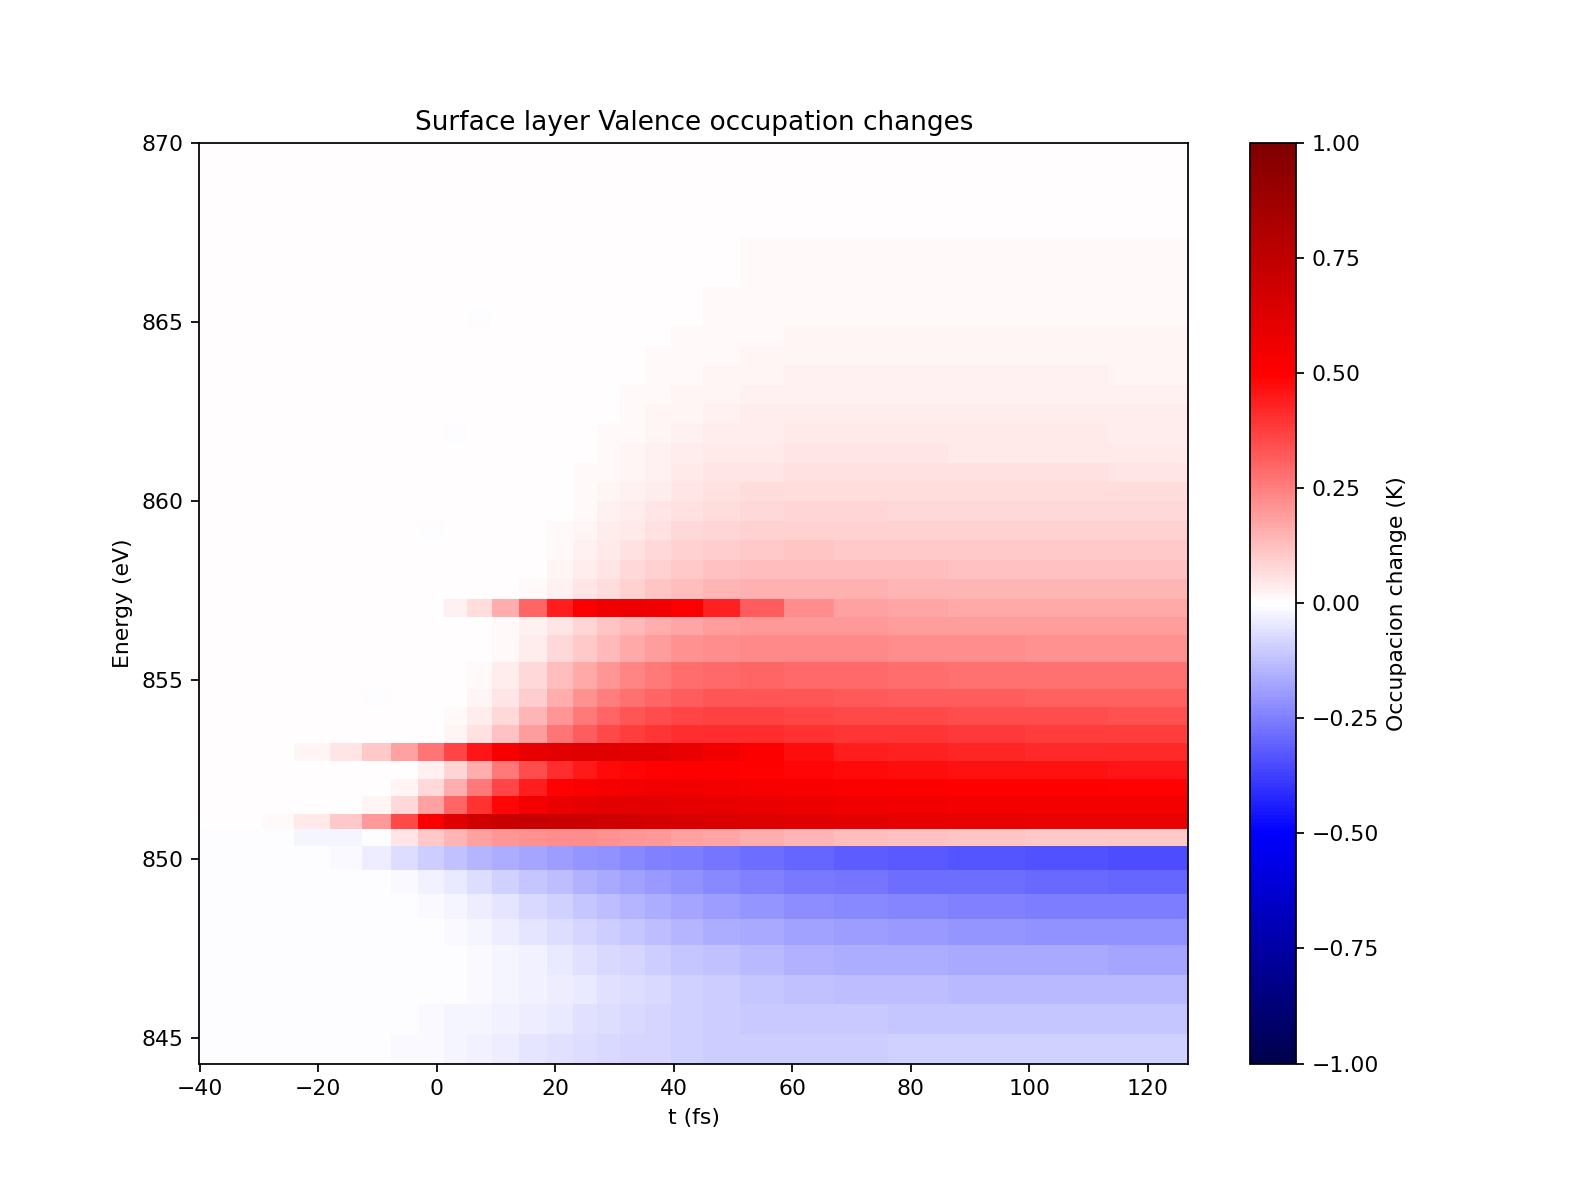

(844.2875, 870.0)

In [6]:
plt.figure()
plt.pcolormesh(sol.t, PAR.E_j +PAR.E_f,
               (sol.rho_j[0]-np.outer(PAR.rho_j_0,np.ones(sol.t.shape)))/np.outer(PAR.m_j,np.ones(sol.t.shape)),
               cmap = plt.cm.seismic, vmin = -1, vmax = 1, shading = 'nearest')#
plt.colorbar(label = 'Occupacion change (K)')
plt.xlabel('t (fs)')
plt.ylabel('Energy (eV)')
plt.title('Surface layer Valence occupation changes')
plt.ylim(None, 870)

<IPython.core.display.Javascript object>


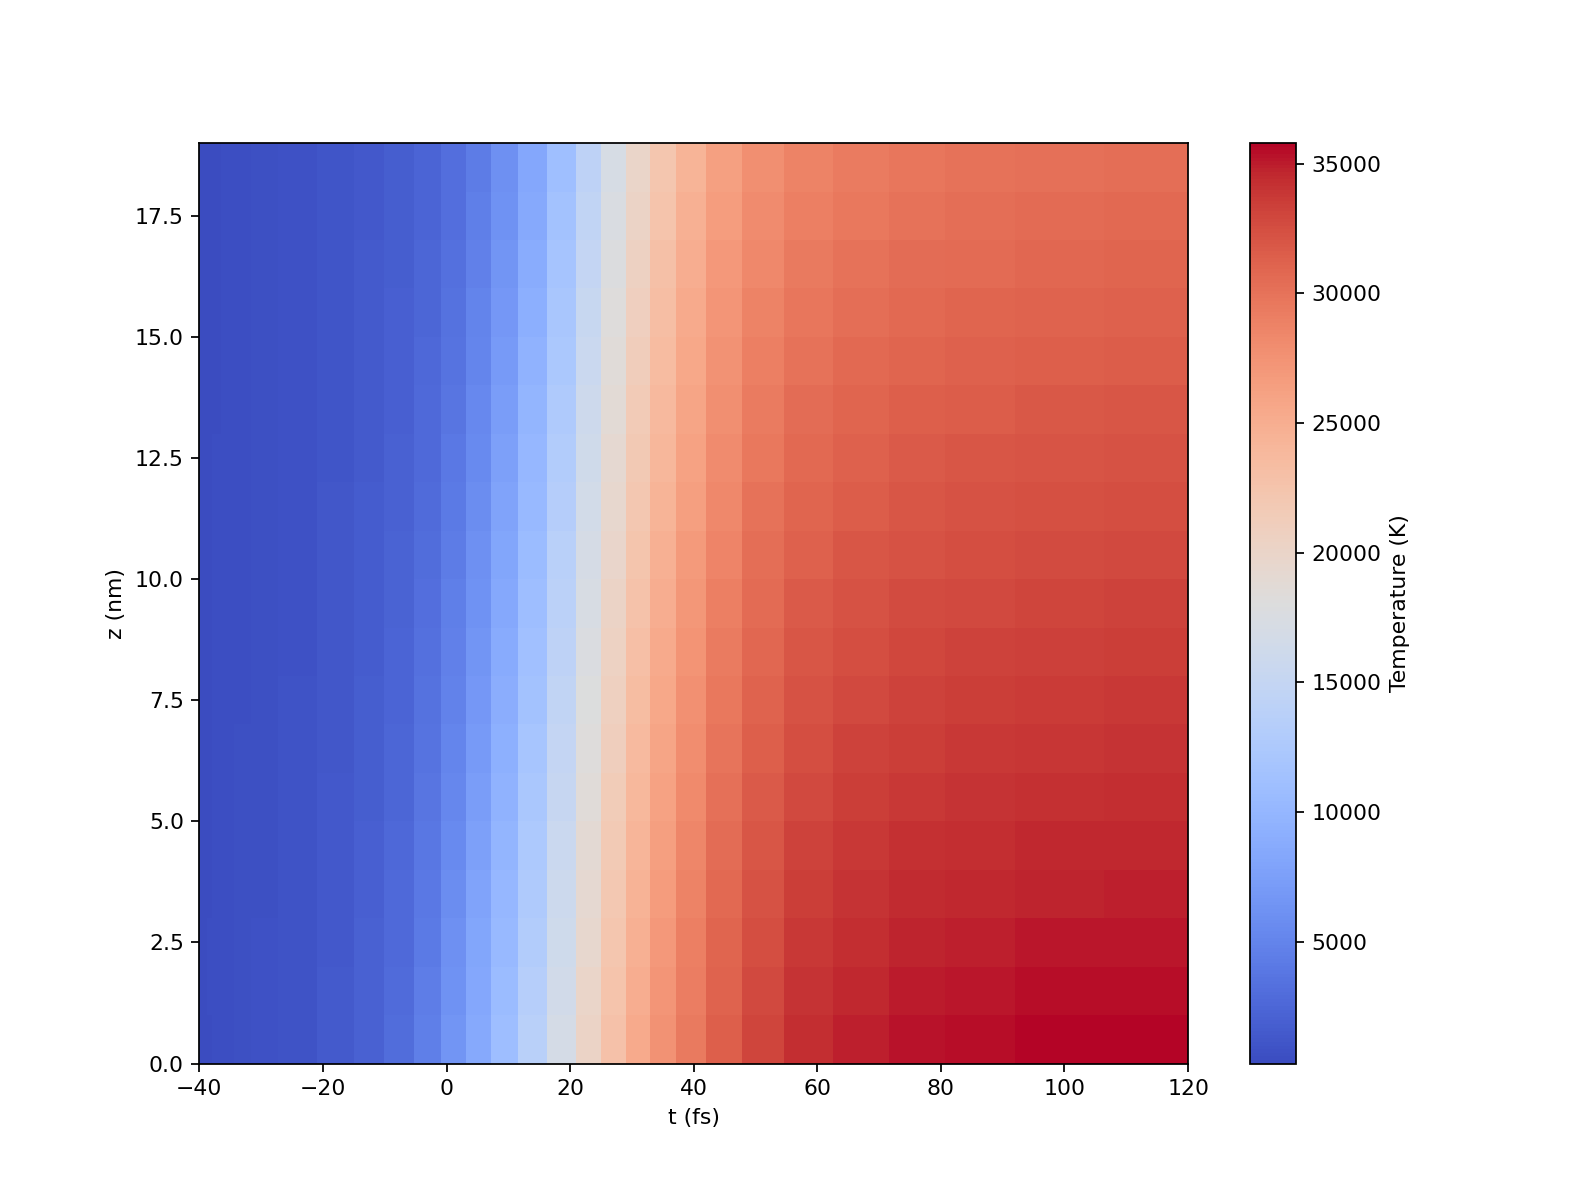

/tmp/ipykernel_174087/160184166.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, sol.temperatures.T, cmap = plt.cm.coolwarm)


Text(0, 0.5, 'z (nm)')

In [7]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.temperatures.T, cmap = plt.cm.coolwarm)
plt.colorbar(label = 'Temperature (K)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


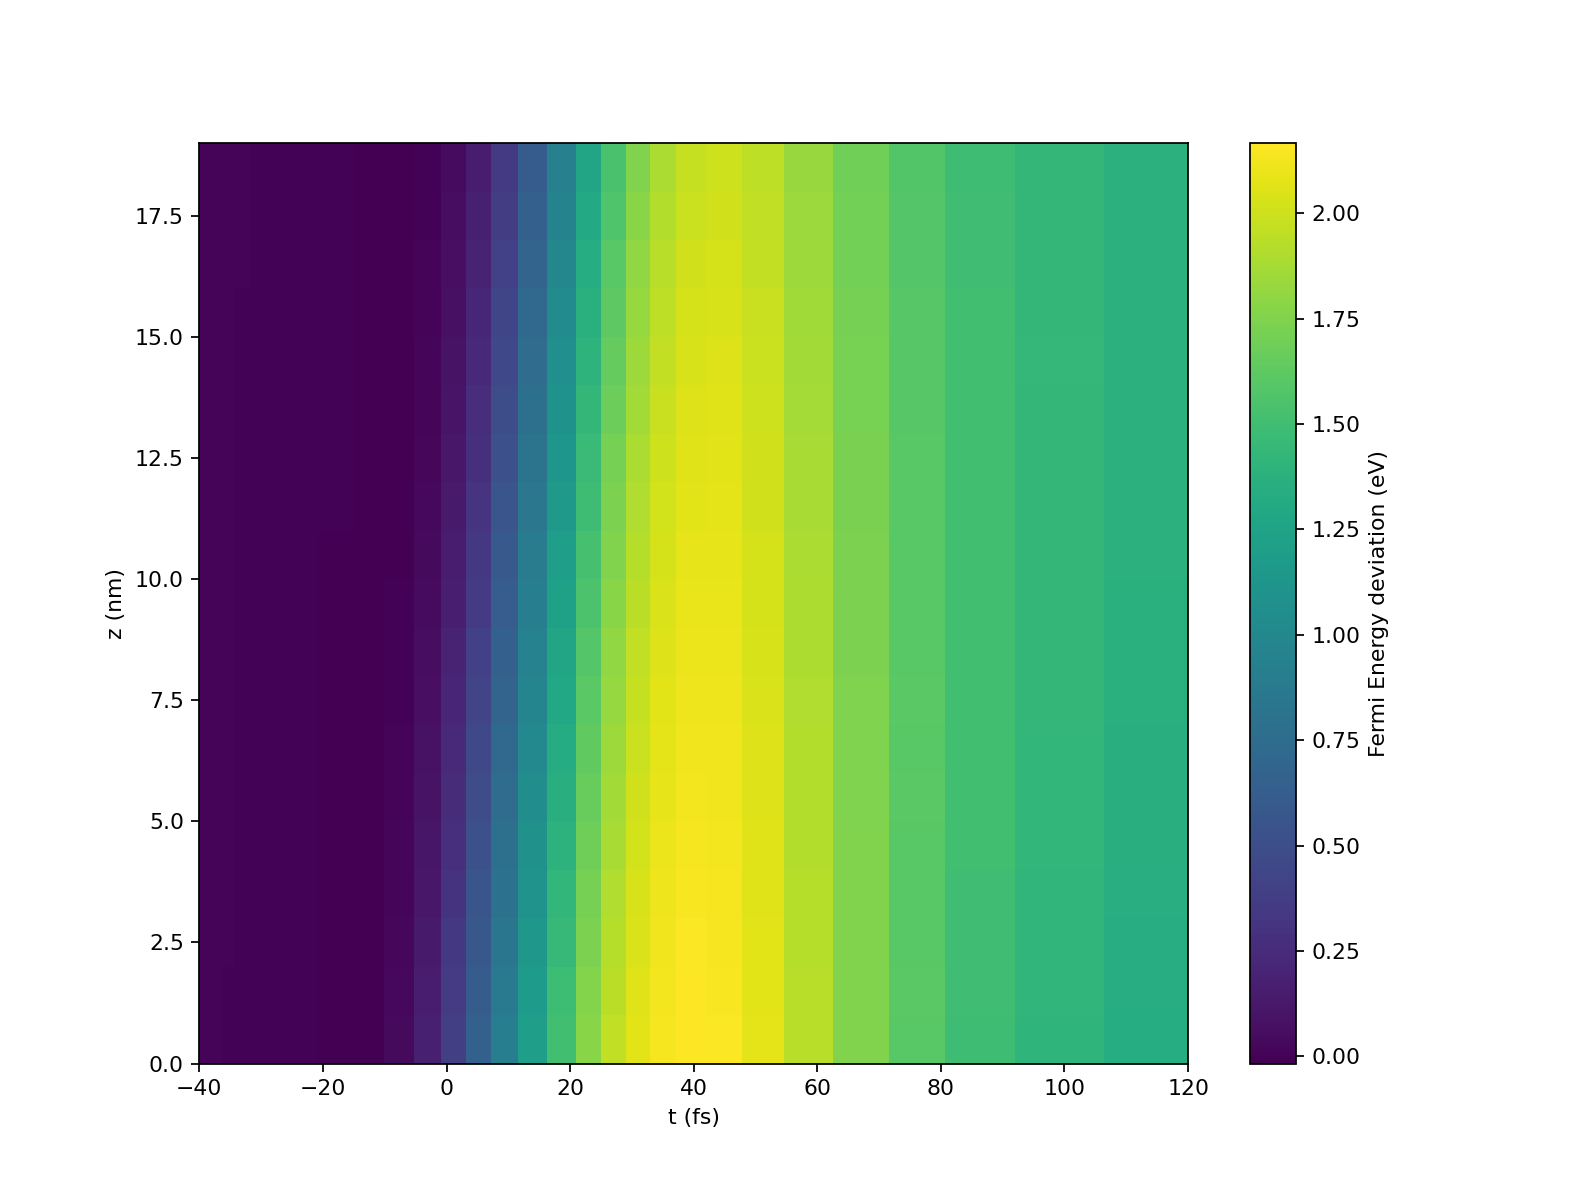

/tmp/ipykernel_174087/203480434.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)


Text(0, 0.5, 'z (nm)')

In [8]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, sol.fermi_energies.T)
plt.colorbar(label = 'Fermi Energy deviation (eV)')
plt.xlabel('t (fs)')
plt.ylabel('z (nm)')

<IPython.core.display.Javascript object>


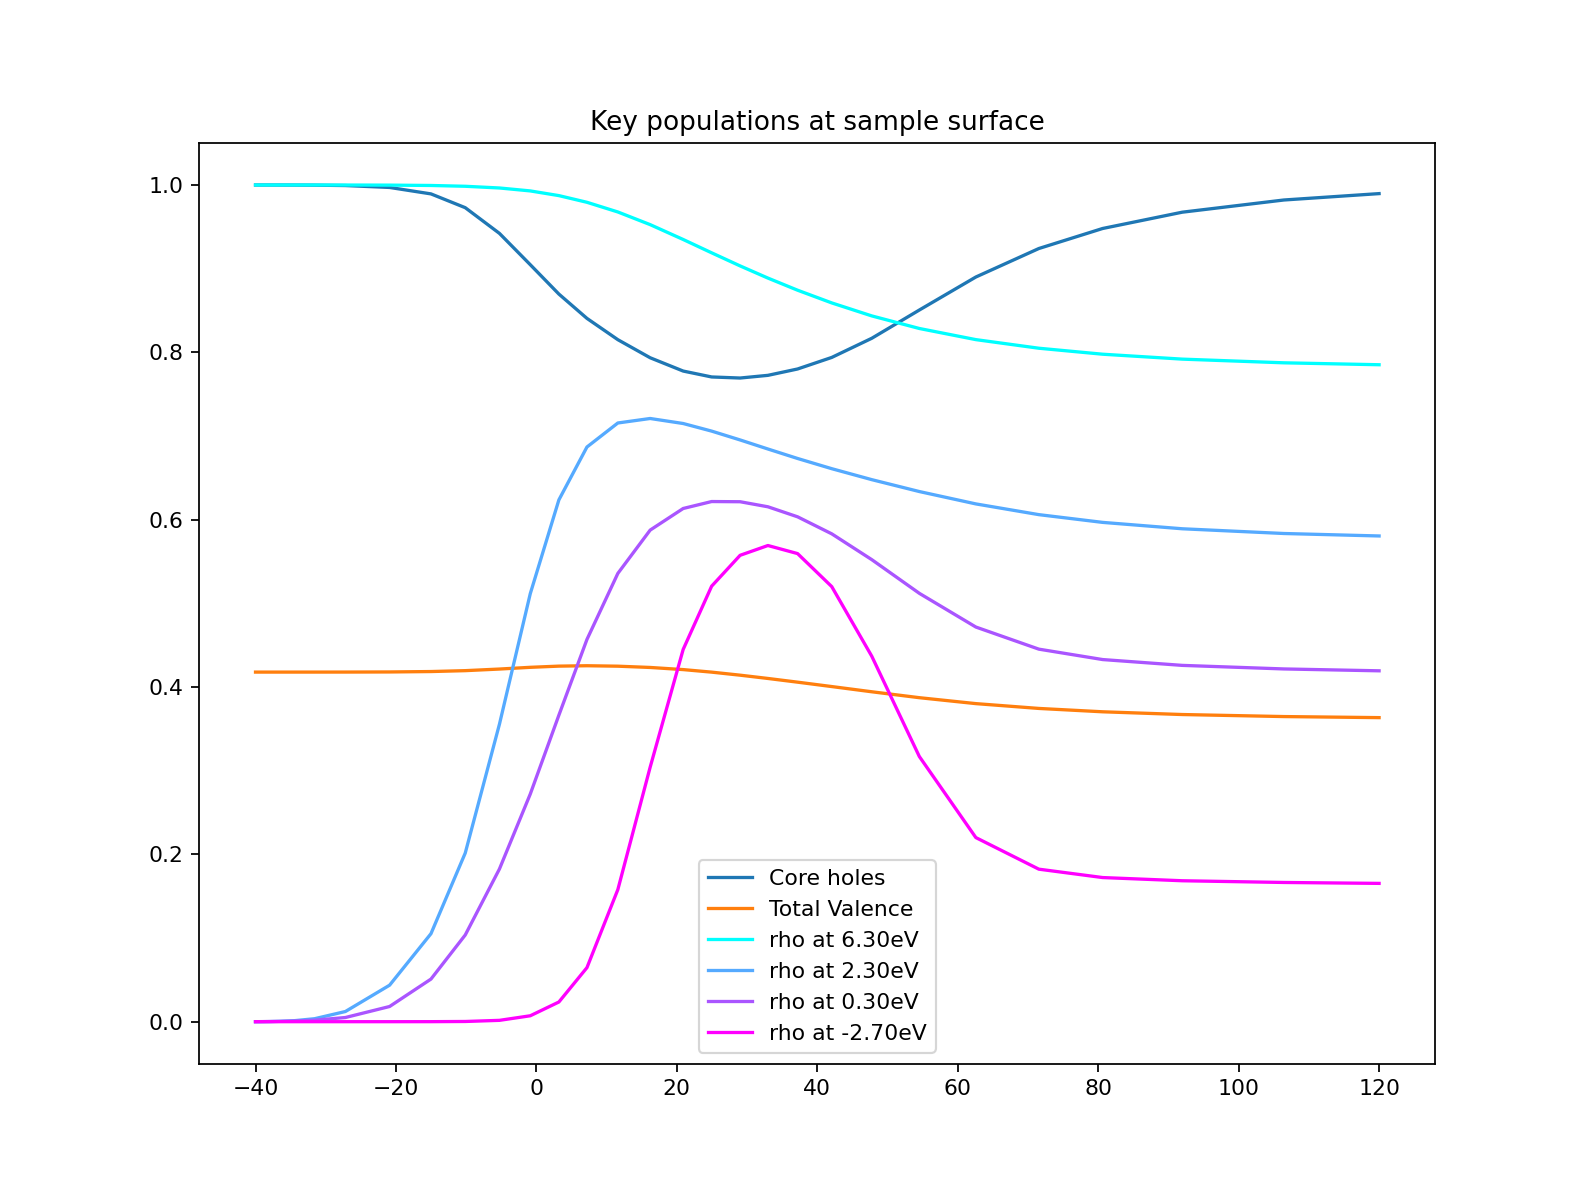

In [9]:
plt.figure()
plt.title('Key populations at sample surface')
plt.plot(sol.t,sol.core[0]/PAR.M_core, label = 'Core holes')
plt.plot(sol.t,(sol.R_VB[0])/PAR.M_VB, label = 'Total Valence')
cols = plt.cm.cool(np.linspace(0,1,PAR.N_photens))
for iE,E in enumerate(PAR.E_i):
    plt.plot(sol.t,sol.rho_j[0,PAR.resonant,:][iE].T/PAR.m_j[PAR.resonant][iE],c = cols[iE], label = f'rho at {E:.2f}eV')
plt.legend()


<IPython.core.display.Javascript object>


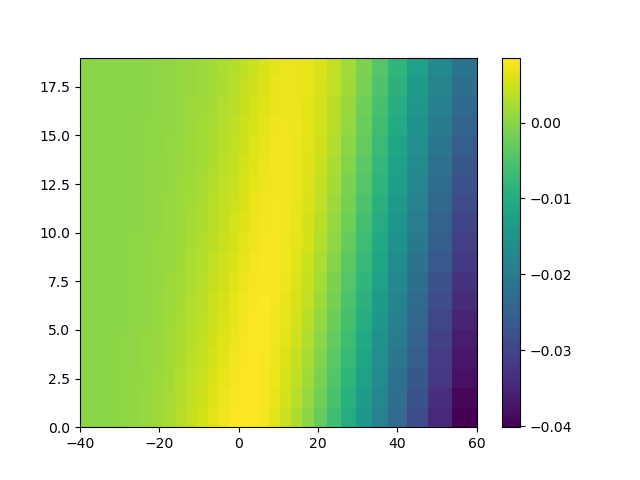

/tmp/ipykernel_121456/52012410.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)


In [34]:
plt.figure()
plt.pcolormesh(sol.t, PAR.zaxis, (sol.R_VB-PAR.R_VB_0)/PAR.M_VB)
plt.colorbar()

In [21]:
sol.t.shape

(40,)

In [77]:
def make_valence_energy_axis(self, N_j: int, min=-6, finemax=10, max=50):
        """
        Creates an energy axis for the valence band, namely
            self.E_j
        and its edgepoints
            self.enax_j_edges
        Energies are relative to the fermi-level. 3/4 of all points fall into the range (min, finemax)
        Makes sure that the energies E_i correspond to a point in E_j and
        drops the closest points to keep the number N_j.
        :param N_j:
        :param min:
        :param finemax:
        :param max:
        :return:
        """
        N_j_fine = int(N_j * 3 / 4)
        N_j_coarse = int(N_j - N_j_fine)

        def fill_biggest_gap(pointlist):
            """
            This function takes a list of points and appends a point in the middle of the biggest gap
            """
            pointlist = np.array(np.sort(pointlist))
            gaps = pointlist[1:]-pointlist[:-1]
            biggest_gap_index = np.argsort(gaps)[-1]
            biggest_gap = gaps[biggest_gap_index]
            list_before = pointlist[:biggest_gap_index+1]
            new_value = pointlist[biggest_gap_index] + 0.5*biggest_gap
            list_after = pointlist[biggest_gap_index+1:]
            return np.concatenate((list_before, [new_value,], list_after))
        
        # The energies E_i and 0 must be in the axis
        enax_j_fine = [min, 0, finemax]+list(self.E_i[self.E_i<=finemax])
        # Fill up the gaps
        while len(enax_j_fine)<N_j_fine:
            enax_j_fine = fill_biggest_gap(enax_j_fine)
        
        dE = np.mean(enax_j_fine[1:]-enax_j_fine[:-1])
        #The same for the coarse part
        enax_j_coarse = [finemax+dE, max]+list(self.E_i[self.E_i>finemax])
        while len(enax_j_coarse)<N_j_coarse:
            enax_j_coarse = fill_biggest_gap(enax_j_coarse)
            
        enax_j = np.concatenate((enax_j_fine, enax_j_coarse))

        if not len(enax_j) == N_j:
            warnings.warn(
                'Energy Axis turned out longer or shorter than planned. What went wrong?')
            self.N_j = len(enax_j)
            
        def edgepoints(middles):
            """ Opposite of midpoints """
            edges = np.empty(middles.shape[0] + 1)
            edges[1:-1] = (middles[1:] + middles[:-1]) / 2
            edges[0] = middles[0] - (middles[1] - middles[0]) / 2
            edges[-1] = middles[-1] + (middles[-1] - middles[-2]) / 2
            return edges

        return enax_j, edgepoints(enax_j)

In [55]:
sim.plot_derivatives?

<IPython.core.display.Javascript object>


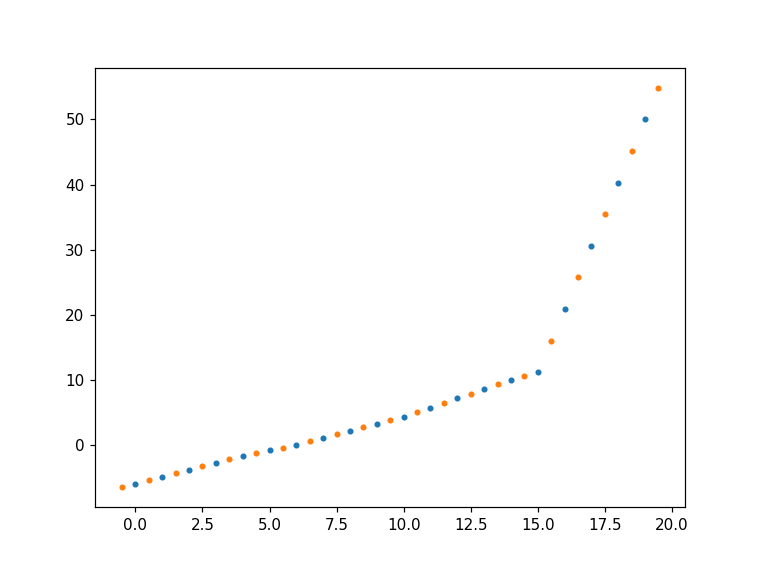

In [82]:
enax, enax_edges = make_valence_energy_axis(PAR, 20, min=-6, finemax=10, max=50)
plt.figure()
plt.plot(np.arange(len(enax)),enax,'.')
plt.plot(np.arange(len(enax_edges))-0.5,enax_edges,'.')